In [1]:
import numpy as np
import pandas as pd
import cv2
from glob import glob

In [2]:
images_path='C:\\Users\\Rishav\\Image caption\\Images\\' 
images=glob(images_path + '*.jpg')#reading all images ending with jpg
len(images)

8091

In [3]:
images[:5]

['C:\\Users\\Rishav\\Image caption\\Images\\1000268201_693b08cb0e.jpg',
 'C:\\Users\\Rishav\\Image caption\\Images\\1001773457_577c3a7d70.jpg',
 'C:\\Users\\Rishav\\Image caption\\Images\\1002674143_1b742ab4b8.jpg',
 'C:\\Users\\Rishav\\Image caption\\Images\\1003163366_44323f5815.jpg',
 'C:\\Users\\Rishav\\Image caption\\Images\\1007129816_e794419615.jpg']

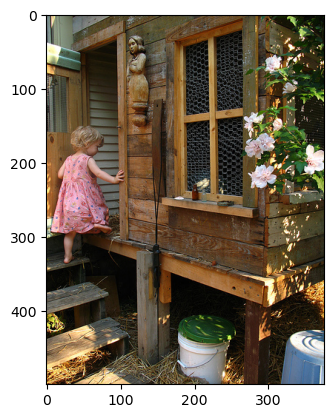

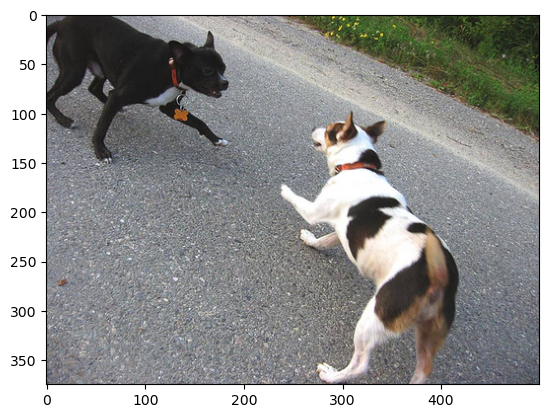

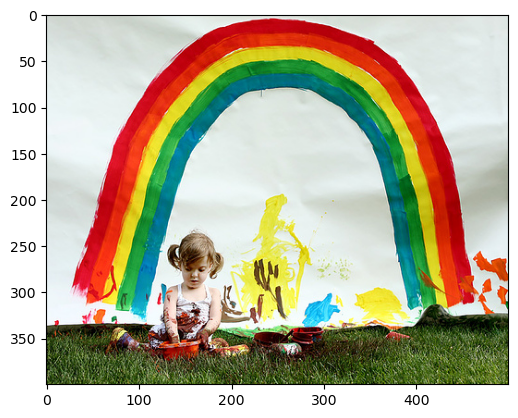

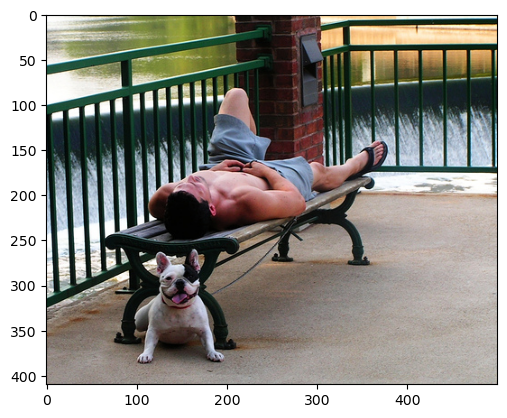

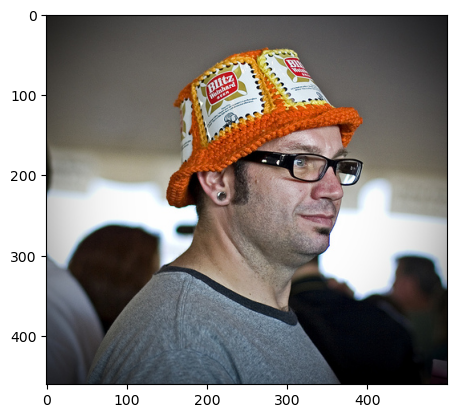

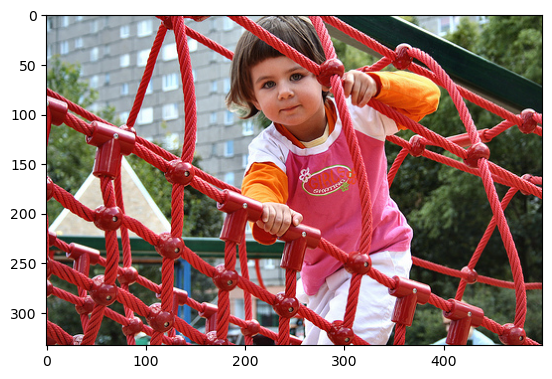

In [4]:
import matplotlib.pyplot as plt
for i in range(6):
    plt.figure()
    img=cv2.imread(images[i])
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)#showing the images by converting in to RGB first
    plt.imshow(img)

In [5]:
from keras.applications import ResNet50 #downloding ResNet50
incept_model=ResNet50(include_top=True)

In [6]:
incept_model.summary() #summary of ResNet50 model

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [7]:
from keras.models import Model
last=incept_model.layers[-2].output
modele=Model(inputs=incept_model.inputs,outputs=last)#removing the last layer in the model
modele.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [8]:
images_features={} #data preprocessing Starts
count=0
for i in images:
    img=cv2.imread(i)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)#conerting the given images to RGB
    img=cv2.resize(img,(224,224))
    
    img=img.reshape(1,224,224,3)
    pred=modele.predict(img).reshape(2048)#returning the values as 2048 vector
     
    img_name=i.split('\\')[-1] #slicing the image name from path
    images_features[img_name]=pred#adding the image feature to the dictionary
    
    count=count+1
    
    if count>100:
        break
    elif count % 50 == 0:
        print(count)

1/1 [==============================] - 0s 84ms/step
50
1/1 [==============================] - 0s 85ms/step
100
1/1 [==============================] - 0s 83ms/step


In [9]:
caption_path = 'C:\\Users\\Rishav\\Image caption\\captions.txt'#text preprocessing starts
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')#splitting the captions
len(captions)

40457

In [10]:
captions

['Caption,Image',
 '1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg,A girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each other on the road .',
 '1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .',
 '1002674143_1b742ab4b8.jpg,A little girl covered in paint sits in front of a painted rainbow wi

In [11]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split(',')[0]
        caption = i.split(',')[1]
        if img_name not in captions_dict:
            captions_dict[img_name] = [caption] #assigning keys and values to images
                
        else:
            captions_dict[img_name].append(caption)
            
    except:
        pass

In [12]:
captions_dict.pop('Caption','Image')

['Image']

In [13]:
captions_dict

{'1000268201_693b08cb0e.jpg': ['A child in a pink dress is climbing up a set of stairs in an entry way .',
  'A girl going into a wooden building .',
  'A little girl climbing into a wooden playhouse .',
  'A little girl climbing the stairs to her playhouse .',
  'A little girl in a pink dress going into a wooden cabin .'],
 '1001773457_577c3a7d70.jpg': ['A black dog and a spotted dog are fighting',
  'A black dog and a tri-colored dog playing with each other on the road .',
  'A black dog and a white dog with brown spots are staring at each other in the street .',
  'Two dogs of different breeds looking at each other on the road .',
  'Two dogs on pavement moving toward each other .'],
 '1002674143_1b742ab4b8.jpg': ['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
  'A little girl is sitting in front of a large painted rainbow .',
  'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .',
  'T

In [14]:
def lowers(st):
    modified=st.lower()
    modified="start "+modified+" end" #lower case all the values
    return modified

In [15]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)]=lowers(vv)#looping through all captions

In [16]:
captions_dict

{'1000268201_693b08cb0e.jpg': ['start a child in a pink dress is climbing up a set of stairs in an entry way . end',
  'start a girl going into a wooden building . end',
  'start a little girl climbing into a wooden playhouse . end',
  'start a little girl climbing the stairs to her playhouse . end',
  'start a little girl in a pink dress going into a wooden cabin . end'],
 '1001773457_577c3a7d70.jpg': ['start a black dog and a spotted dog are fighting end',
  'start a black dog and a tri-colored dog playing with each other on the road . end',
  'start a black dog and a white dog with brown spots are staring at each other in the street . end',
  'start two dogs of different breeds looking at each other on the road . end',
  'start two dogs on pavement moving toward each other . end'],
 '1002674143_1b742ab4b8.jpg': ['start a little girl covered in paint sits in front of a painted rainbow with her hands in a bowl . end',
  'start a little girl is sitting in front of a large painted rainb

In [17]:
count_words={}
count=1
for k,vv in captions_dict.items():
    for v in vv:
        for word  in v.split():
            if word not in count_words:
                count_words[word]=count 
                count=count+1
        
            

In [18]:
(count_words)

{'start': 1,
 'a': 2,
 'child': 3,
 'in': 4,
 'pink': 5,
 'dress': 6,
 'is': 7,
 'climbing': 8,
 'up': 9,
 'set': 10,
 'of': 11,
 'stairs': 12,
 'an': 13,
 'entry': 14,
 'way': 15,
 '.': 16,
 'end': 17,
 'girl': 18,
 'going': 19,
 'into': 20,
 'wooden': 21,
 'building': 22,
 'little': 23,
 'playhouse': 24,
 'the': 25,
 'to': 26,
 'her': 27,
 'cabin': 28,
 'black': 29,
 'dog': 30,
 'and': 31,
 'spotted': 32,
 'are': 33,
 'fighting': 34,
 'tri-colored': 35,
 'playing': 36,
 'with': 37,
 'each': 38,
 'other': 39,
 'on': 40,
 'road': 41,
 'white': 42,
 'brown': 43,
 'spots': 44,
 'staring': 45,
 'at': 46,
 'street': 47,
 'two': 48,
 'dogs': 49,
 'different': 50,
 'breeds': 51,
 'looking': 52,
 'pavement': 53,
 'moving': 54,
 'toward': 55,
 'covered': 56,
 'paint': 57,
 'sits': 58,
 'front': 59,
 'painted': 60,
 'rainbow': 61,
 'hands': 62,
 'bowl': 63,
 'sitting': 64,
 'large': 65,
 'small': 66,
 'grass': 67,
 'plays': 68,
 'fingerpaints': 69,
 'canvas': 70,
 'it': 71,
 'there': 72,
 'pigt

In [19]:
for k,vv in captions_dict.items():
    for v in vv:
        encoded=[]
        for word in v.split():
            encoded.append(count_words[word]) #encoding the words
            
            
        captions_dict[k][vv.index(v)]=encoded
        

In [20]:
captions_dict

{'1000268201_693b08cb0e.jpg': [[1,
   2,
   3,
   4,
   2,
   5,
   6,
   7,
   8,
   9,
   2,
   10,
   11,
   12,
   4,
   13,
   14,
   15,
   16,
   17],
  [1, 2, 18, 19, 20, 2, 21, 22, 16, 17],
  [1, 2, 23, 18, 8, 20, 2, 21, 24, 16, 17],
  [1, 2, 23, 18, 8, 25, 12, 26, 27, 24, 16, 17],
  [1, 2, 23, 18, 4, 2, 5, 6, 19, 20, 2, 21, 28, 16, 17]],
 '1001773457_577c3a7d70.jpg': [[1, 2, 29, 30, 31, 2, 32, 30, 33, 34, 17],
  [1, 2, 29, 30, 31, 2, 35, 30, 36, 37, 38, 39, 40, 25, 41, 16, 17],
  [1,
   2,
   29,
   30,
   31,
   2,
   42,
   30,
   37,
   43,
   44,
   33,
   45,
   46,
   38,
   39,
   4,
   25,
   47,
   16,
   17],
  [1, 48, 49, 11, 50, 51, 52, 46, 38, 39, 40, 25, 41, 16, 17],
  [1, 48, 49, 40, 53, 54, 55, 38, 39, 16, 17]],
 '1002674143_1b742ab4b8.jpg': [[1,
   2,
   23,
   18,
   56,
   4,
   57,
   58,
   4,
   59,
   11,
   2,
   60,
   61,
   37,
   27,
   62,
   4,
   2,
   63,
   16,
   17],
  [1, 2, 23, 18, 7, 64, 4, 59, 11, 2, 65, 60, 61, 16, 17],
  [1,
   2,
   6

In [24]:
MAX_LEN=0
for k,vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN=len(v)#size of encoded sentences 
MAX_LEN     

36

In [33]:
from keras.utils import to_categorical
from keras_preprocessing.sequence import pad_sequences

VOCAB_SIZE = len(count_words)

def generator(photo, caption):
    n_samples = 0
    
    X = []#image features here
    y_in = []
    y_out = []
    a=0
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
        a=a+1
        if a==100:
            break
    return X, y_in, y_out
    

In [34]:
X, y_in, y_out = generator(images_features, captions_dict)

In [35]:
images_features

{'1000268201_693b08cb0e.jpg': array([0.16725852, 0.46361926, 0.00352356, ..., 0.11895251, 0.4263413 ,
        1.3225994 ], dtype=float32),
 '1001773457_577c3a7d70.jpg': array([1.4409866 , 1.043546  , 0.23661026, ..., 0.39719468, 0.04307788,
        0.30509183], dtype=float32),
 '1002674143_1b742ab4b8.jpg': array([1.5449812e+00, 9.8683006e-01, 1.1314178e-04, ..., 0.0000000e+00,
        1.1347512e+00, 4.7488478e-01], dtype=float32),
 '1003163366_44323f5815.jpg': array([0.9030611 , 0.11390921, 0.74887115, ..., 0.33106774, 0.        ,
        0.        ], dtype=float32),
 '1007129816_e794419615.jpg': array([0.33239824, 2.286729  , 0.        , ..., 0.20395713, 0.        ,
        0.25451937], dtype=float32),
 '1007320043_627395c3d8.jpg': array([1.6907164 , 0.7195159 , 0.09514083, ..., 0.        , 0.24099395,
        0.0030701 ], dtype=float32),
 '1009434119_febe49276a.jpg': array([0.40478376, 0.33644983, 0.4330247 , ..., 0.36723483, 0.09850312,
        0.16856465], dtype=float32),
 '1012212

In [36]:
len(X), len(y_in), len(y_out)

(6293, 6293, 6293)

In [37]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64') 

In [38]:
X.shape, y_in.shape, y_out.shape

((6293, 2048), (6293, 36), (6293, 8871))

In [42]:
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [43]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(count_words)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)


model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               262272    
                                                                 
 repeat_vector (RepeatVector  (None, 36, 128)          0         
 )                                                               
                                                                 
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 36, 128)           1135488   
                                                                 
 lstm (LSTM)                 (None, 36, 256)           394240    
                            